# High temperature electrolysis (HTE)

The following figure contains a basic diagram of a HTE unit coupled to a nuclear reactor.

https://www.sciencedirect.com/science/article/pii/S0149197007001709

More details in https://inldigitallibrary.inl.gov/sites/sti/sti/4480292.pdf

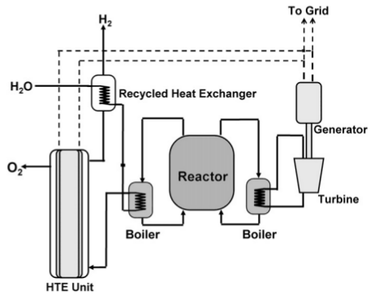

In [103]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte.png')
w, h = img.size
b = 300
a = int(w/h*b)
img.resize(a, b)
img

### Theoretical values

From Figure 8 of https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf
we get the following values for $\Delta$G and T$\Delta$S.

Values are consistent with: https://janaf.nist.gov/tables/H-064.html

Text(0.5, 0, 'Temperature [$^\\circ$C]')

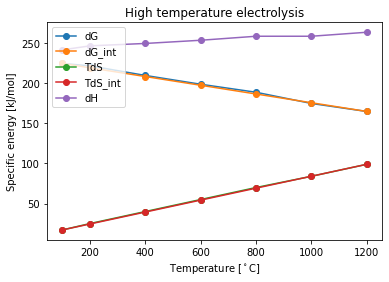

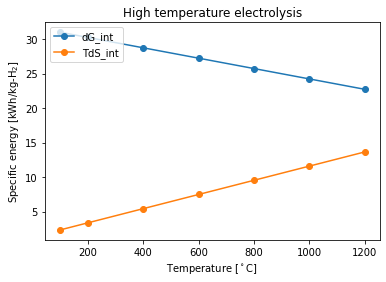

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Values from the report
dg_T = [225, 222, 210, 199, 189, 175, 165]
tds_T = [17, 25, 40, 55, 70, 84, 99]
temp = [100, 200, 400, 600, 800, 1000, 1200]

# Linear interpolation using first and last values (T=100 & T=1200)
dg_int = [(dg_T[-1]-dg_T[0])/(temp[-1]-temp[0])*(T-temp[0])+dg_T[0] for T in temp]
tds_int = [(tds_T[-1]-tds_T[0])/(temp[-1]-temp[0])*(T-temp[0])+tds_T[0] for T in temp]
ds_int = np.array(tds_int)/(np.array(temp)+273)

plt.figure(1)
plt.plot(temp, dg_T, label='dG', marker='o')
plt.plot(temp, dg_int, label='dG_int', marker='o')
plt.plot(temp, tds_T, label='TdS', marker='o')
plt.plot(temp, tds_int, label='TdS_int', marker='o')
plt.plot(temp, np.array(dg_T)+np.array(tds_T), label='dH', marker='o')
plt.legend(loc="upper left")
plt.title('High temperature electrolysis')
plt.ylabel('Specific energy [kJ/mol]')
plt.xlabel('Temperature [$^\circ$C]')

# Convert values to kWh/kg-H2
plt.figure(2)
plt.plot(temp, np.array(dg_int)/3600/2/1.008/1e-3, label='dG_int', marker='o')
plt.plot(temp, np.array(tds_int)/3600/2/1.008/1e-3, label='TdS_int', marker='o')
plt.legend(loc="upper left")
plt.title('High temperature electrolysis')
plt.ylabel('Specific energy [kWh/kg-H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')

Note for my future self:

T$\Delta$S (1000C) < 100 kJ/mol, and according to https://ieeexplore.ieee.org/abstract/document/5898382 such value should be 112.9 kJ/mol. In fig. 1 in https://www.sciencedirect.com/science/article/abs/pii/0360319980901147 T$\Delta$S (1000C) < 100 kJ/mol as well. So, I take these values to be right.

### Some real numbers

T = 700-750C (Pressure = 5 bar), electrical energy=36.8kWh/kg, thermal energy=5.9kWh/kg, steam utilization 60%.

https://www.hydrogen.energy.gov/pdfs/review19/ta019_ghezel-ayagh_2019_o.pdf

T = 1050K = 780C, electrical energy = 51.02 kWh/kg-H$_2$, thermal energy = 10.66 kWh/kg-H$_2$.

https://www1.eere.energy.gov/solar/pdfs/doctor.pdf

T = 800C (Pressure = 3.5 MPa), P=18 kW, 5.7 Nm$^3$/h.

https://inldigitallibrary.inl.gov/sites/sti/sti/4480292.pdf

In [24]:
E = 18  # Energy [kWh]
M = 5.7*0.084 # Mass of H2 [kg]
se = E/M
print("Specific energy: ", se, "kWh/H2kg")  # Specific energy [kWh/kg]

Specific energy:  37.59398496240601 kWh/H2kg


T = 1000C, P=39.3 W, 17.6 Nl/h.

https://ieeexplore.ieee.org/abstract/document/5898382

In [25]:
E = 39.3e-3  # Energy [kWh]
M = 17.6*1e-3*0.084  # Mass of H2 [kg]
se = E/M
print("Specific energy: ", se, "kWh/kg-H2")  # Specific energy [kWh/kg]

Specific energy:  26.582792207792206 kWh/kg-H2


600 MWth gas cooled reactor could produce 85 million SCFD = 2.5 kg/s = 9000 kg/h = 216e3 kg/day... seems too much a priori.

https://www.energy.gov/sites/prod/files/2014/08/f18/fcto_2014_electrolytic_h2_wkshp_obrien1.pdf

In [26]:
def SCFD_to_kgps(quant):
    # [standard cft/d to kg/s]
    return quant/35.3147/3600/24*0.088

print(SCFD_to_kgps(85e6))
2.5 * 3600 * 24  #kg/day

2.4515024642450327


216000.0

Text(0.5, 0, 'Temperature [$^\\circ$C]')

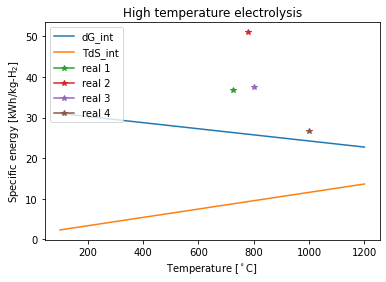

In [11]:
#I add the real values to the last plot.
tsr1 = [725, 36.8]  #5.9
tsr2 = [780, 51.0]  #10.7
tsr3 = [800, 37.6] 
tsr4 = [1000, 26.6]

plt.plot(temp, np.array(dg_int)/3600/2/1.008/1e-3, label='dG_int')
plt.plot(temp, np.array(tds_int)/3600/2/1.008/1e-3, label='TdS_int')
plt.plot(tsr1[0], tsr1[1], label='real 1', marker='*')
plt.plot(tsr2[0], tsr2[1], label='real 2', marker='*')
plt.plot(tsr3[0], tsr3[1], label='real 3', marker='*')
plt.plot(tsr4[0], tsr4[1], label='real 4', marker='*')
plt.legend(loc="upper left")
plt.title('High temperature electrolysis')
plt.ylabel('Specific energy [kWh/kg-H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')

### Energy requirements

The following section analyzes different cases in increasing order of complexity. This sections calculates the energy requirements and also the production rate capacity for different reactor sizes.

**Note for future self:**
How does the thermal-to-electrical efficiency affect the calculations?

#### Some Chemistry

Q - W = $\bar{h^\circ_c} + \sum_p n_p (\bar{h} - \bar{h^\circ})_p - \sum_r n_r (\bar{h} - \bar{h^\circ})_r$

(15-10) "Thermodynamics: An Engineering Approach" 7th Edition,Cengel

Data NIST:
* H$_2$O (g): https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1EBF&Type=JANAFG&Plot=on#JANAFG
* H$_2$ (g): https://webbook.nist.gov/cgi/cbook.cgi?ID=C1333740&Mask=1#Thermo-Gas
* O$_2$ (g): https://webbook.nist.gov/cgi/cbook.cgi?ID=C7782447&Mask=1#Thermo-Gas

More tables (NIST):
* https://janaf.nist.gov/
* https://janaf.nist.gov/tables/H-064.html

$\Delta$ S (T, P) = $\Delta$ S$^{\circ}$ (T, P$_{0}$ = 1atm) - R * $ln(P/P_{0}$)

### HTE 1

Two cases of high temperature electrolysis (HTE) will be considered:
* HTE1: steam temperature reaches values that make HTE feasible, T $\in$ [600-900$^\circ$C] with the thermal heat given by the reactor. This case considers reactors which outlet temperatures $\in$ [600-900$^\circ$C].
* HTE2: steam temperature is boosted using resistive heating.

The system analysis of a HTE plant coupled to a nuclear reactor can get messy real quick. The following sections describe different cases that take into account an increasing degree of complexity.

#### Very simple HTE 1

* T$_e$: temperature at which the electrolysis occurs.
* T$_o$: reactor outlet temperature.

For an outlet temperature of 850C, the maximum steam temperature is 827C, which yields a 97% eficiency. https://www.osti.gov/servlets/purl/814014

Then, for this case T$_e$ = 0.97 T$_o$

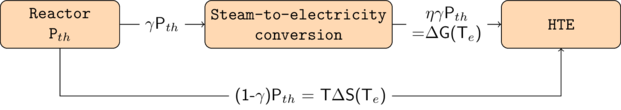

In [104]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure0.png')
w, h = img.size
b = 110
a = int(w/h*b)
img.resize(a, b)
img

In [10]:
def power_req(P, Te):
    # P [atm], T[C]
    R = 8.314  # [J/mol/K]
    # In theory dh doesn't change with P (I checked, this is correct)
    dh = np.interp(Te, temp, dg_int) + np.interp(Te, temp, tds_int)
    tds = np.interp(Te, temp, tds_int) - R*(Te+273)*np.log(P)/1e3
    dg = dh - tds  # [kJ/mol]

    return dg, tds

def very_simple_hte1(P, outT):
    eta = 0.33 # thermal-to-electrical energy conversion efficiency
    ef = 0.97
    Te = ef * outT # Electrolysis temperature
    # etagammaPth = \eta * \gamma * P_{th} = \Delta G (P, T)
    # gamma comp = (1-\gamma) * P_{th} = T*\Delta S (P, T)
    etagammaPth, gammacPth = power_req(P, Te)
    gammaPth = etagammaPth/eta  # Electrical power
    Pth = gammaPth + gammacPth  # P_{th} [kJ/mol] = total power
    gamma = gammaPth/Pth  # \gamma
    Pth = Pth/(2*1.008*3.6)  # [kWh/kg-H2]

    return Pth, gamma

The following cells highlight the importance of taking into account the pressure.

In [13]:
#This cell doesn't take into account pressure changes
P = 1 #
outT = 850  # Outlet reactor temperature

print("Required power: ", very_simple_hte1(P, outT)[0], "kWh/kg-H2")  # [kWh/kg]

Required power:  87.2291525463874 kWh/kg-H2


In [14]:
#This cell takes into account pressure changes
P = 3.5  # MPa
P *= 9.86923 # MPa -> atm
outT = 850  # Outlet reactor temperature

print("Required power: ", very_simple_hte1(P, outT)[0], "kWh/kg-H2")  # [kWh/kg]

Required power:  96.27092553555666 kWh/kg-H2


In the following figure, we see the effects of pressure changes on the energy requirements. Although $\Delta$H is not affected by the pressure variations, $\Delta$G and T$\Delta$S change. As $\Delta G$ increases, the total reactor power to produce 1kg of H$_2$ increases as well.

It may seem a poor choice to use high temperature electrolysis at high pressure, then. The reason why we chose a high pressure in the beginning is to save energy, as compressing liquid water is cheaper than compressing the hydrogen once it is produced. I should check if this is effectively true.

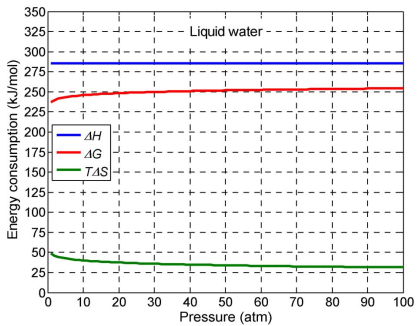

In [15]:
from IPython.display import Image
Image(filename='figures/hte-pressure.png')

In [48]:
def plot_pth_T(P, outTl, function, xlab, name="default"):
    """
    plots power requirement to produce 1 kg-H2, and gamma
    for different temperatures.
    P: pressure [atm]
    outTl: list of outlet temperatures of the reactor [C]
    function: name of the function of the case to analyze
    name: name of the figure to plot
    """

    Pl = [function(P, outT)[0] for outT in outTl]
    gl = [function(P, outT)[1] for outT in outTl]
    gpl = np.array(gl) * np.array(Pl)
    gcl = (1-np.array(gl)) * np.array(Pl)

    fig, ax1 = plt.subplots()
    ax1.plot(outTl, Pl, label='P$_{th}$', marker='o')
    ax1.plot(outTl, gpl, label='$\gamma$P$_{th}$', marker='o')
    ax1.plot(outTl, gcl, label='$(1-\gamma)$P$_{th}$', marker='o')
    ax1.legend(loc="upper left", bbox_to_anchor=(1.2, 1.0), fancybox=True)
    ax1.set_title("HTE", color="black")
    ax1.set_ylabel("Specific energy [kWh/kg-H$_2$]", color="black")
    ax1.set_xlabel(xlab+"[$^\circ$C]")
    ax2 = ax1.twinx()
    ax2.plot(outTl, gl, color='red', marker="o")
    ax2.set_ylabel('$\gamma$', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    fig.tight_layout()
    plt.savefig("figures/"+name, dpi=300, bbox_inches="tight")
    plt.show()

def plot_pr_P(P, outT, function, name="default"):
    """
    plots the production rate for different reactor sizes.
    P: pressure [atm]
    outT: outlet temperature of the reactor [C]
    function: name of the function of the case to analyze
    name: name of the figure to plot
    """

    Pth = function(P, outT)[0]
    power = [10, 20, 30, 40, 50]  # [MW_{th}]
    prate = [p*1e3/Pth for p in power]

    plt.plot(power, prate, label='$\eta$=33%, T$_o$={0}$^\circ$C'.format(outT))
    plt.legend(loc="upper left")
    plt.title('HTE hydrogen production rate for different reactor sizes.')
    plt.ylabel('Production rate [kg/h]')
    plt.xlabel('Power [MW$_{th}$]')
    plt.savefig("figures/"+name, dpi=300, bbox_inches="tight")
    plt.show()

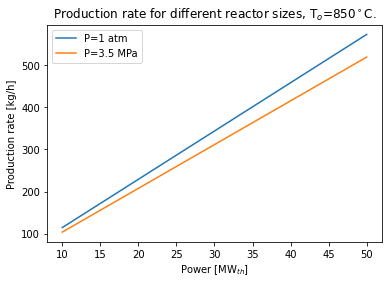

In [49]:
# I choose the reactor outlet temperature to be 850C.
name = "verysimple-hte1-Pcomparison"
outT = 850
Pth1 = very_simple_hte1(1, outT)[0]
P = 3.5
P *= 9.86923
Pth2 = very_simple_hte1(P, outT)[0]
power = [10, 20, 30, 40, 50]  # [MW_{th}]
prate1 = [p*1e3/Pth1 for p in power]
prate2 = [p*1e3/Pth2 for p in power]

plt.plot(power, prate1, label='P=1 atm')
plt.plot(power, prate2, label='P=3.5 MPa')
plt.legend(loc="upper left")
plt.title('Production rate for different reactor sizes, T$_o$={0}$^\circ$C.'.format(outT))
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/"+name, dpi=300, bbox_inches="tight")
plt.show()

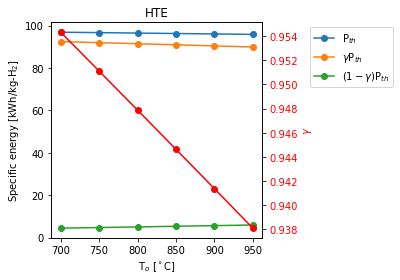

In [51]:
P = 3.5
P *= 9.86923 # MPa -> atm
outTl = [700, 750, 800, 850, 900, 950]

plot_pth_T(P, outTl, very_simple_hte1, "T$_o$ ","verysimple-hte1-overT")

#### Simple HTE1:

* T$_e$: temperature at which the electrolysis occurs.
* T$_o$: outlet reactor temperature.
* T$_r$: 97% of T$_o$.

T$_e$ = T$_r$.

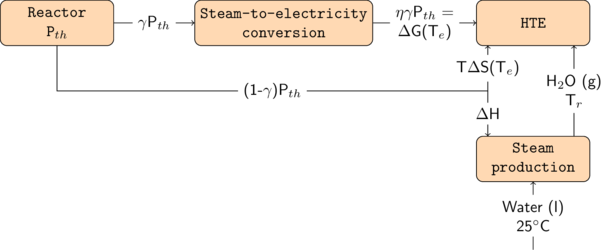

In [105]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure1.png')
w, h = img.size
b = 250
a = int(w/h*b)
img.resize(a, b)
img

In [31]:
def delta_H(Tout, Tin):
    """ calculates H(Tout)-H(Tin) """

    # Enthalpy of water at different temperatures for P = 3.5MPa
    temp2 = [25, 50, 75, 100, 125, 150, 175, 200, 225, 242.56, 242.56, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
    ent35 = [1.9468, 3.8255, 5.7076, 7.5974, 9.5, 11.423, 13.374, 15.368, 17.421, 18.912, 50.49, 50.977, 52.4, 53.657, 54.823, 55.935, 57.012, 58.066, 59.106, 60.136, 61.16, 62.182, 63.203, 64.225, 65.249, 66.276, 67.306, 68.341, 69.381, 70.426, 71.477, 72.534, 73.597, 74.666, 75.742, 76.825, 77.914, 79.009, 80.112, 81.221, 82.337, 83.459]    
    dH = np.interp(Tout, temp2, ent35) - np.interp(Tin, temp2, ent35) # [kJ/mol]

    return dH

def simple_hte1(P, outT):
    """
    calculates the thermal power [Pth] required to produce 1kg-H2,
    and gamma = Pth->e/Pth, Pth->e is the thermal power that is converted
    into electricity.
    
    P: pressure [atm]
    outT: reactor outlet temperature [C]
    
    returns:
    --------
    Pth: [float]
    gamma: [float]
    """

    eta = 0.33 # thermal-to-electrical energy conversion efficiency
    ef = 0.97  # The steam temperature gets to a 97% of the outlet reactor temperature
    Tr = ef * outT # Electrolysis temperature
    # etagammaPth = \eta * \gamma * P_{th} = \Delta G (P, T)
    # gamma comp = (1-\gamma) * P_{th} = T*\Delta S (P, T) + Steamp prodcution
    etagammaPth, gammacPth = power_req(P, Tr)

    # Enthalpy of water at different temperatures for P = 3.5MPa
    temp2 = [25, 50, 75, 100, 125, 150, 175, 200, 225, 242.56, 242.56, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
    ent35 = [1.9468, 3.8255, 5.7076, 7.5974, 9.5, 11.423, 13.374, 15.368, 17.421, 18.912, 50.49, 50.977, 52.4, 53.657, 54.823, 55.935, 57.012, 58.066, 59.106, 60.136, 61.16, 62.182, 63.203, 64.225, 65.249, 66.276, 67.306, 68.341, 69.381, 70.426, 71.477, 72.534, 73.597, 74.666, 75.742, 76.825, 77.914, 79.009, 80.112, 81.221, 82.337, 83.459]    

    gammacPth += delta_H(Tr, 25)
    
    gammaPth = etagammaPth/eta  # Electrical power
    Pth = gammaPth + gammacPth  # P_{th} [kJ/mol] = total power
    gamma = gammaPth/Pth  # \gamma
    Pth = Pth/(2*1.008*3.6)  # [kWh/kg-H2]

    return Pth, gamma

In [32]:
P = 3.5 #
P *= 9.86923 # MPa -> atm
outT = 850  # Outlet reactor temperature

print("Required power: ", simple_hte1(P, outT)[0], "kWh/kg-H2")  # [kWh/kg]

Required power:  106.43594978599758 kWh/kg-H2


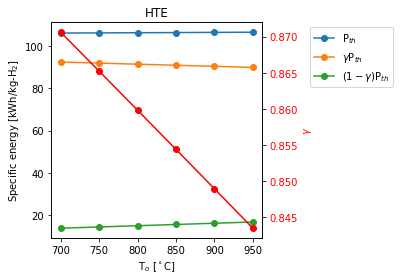

In [52]:
P = 3.5
P *= 9.86923 # MPa -> atm
outTl = [700, 750, 800, 850, 900, 950]

plot_pth_T(P, outTl, simple_hte1, "T$_o$ ","simple-hte1-overT")

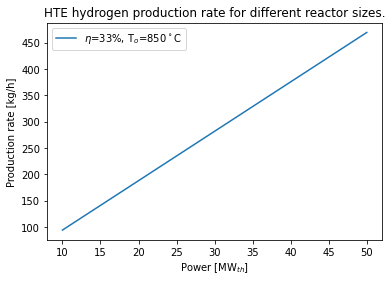

In [45]:
P = 3.5
P *= 9.86923 # MPa -> atm
outT = 850

plot_pr_P(P, outT, simple_hte1, name="simple-hte1-size")

#### Complex HTE1: 

This case should have similar results to *Simple HTE1*. The difference is that the steam carries the thermal energy  itself.

* T$_e$: temperature at which the electrolysis occurs.
* T$_o$: reactor outlet temperature.
* T$_r$: 97% of T$_o$.

T$_r$ > T$_e$

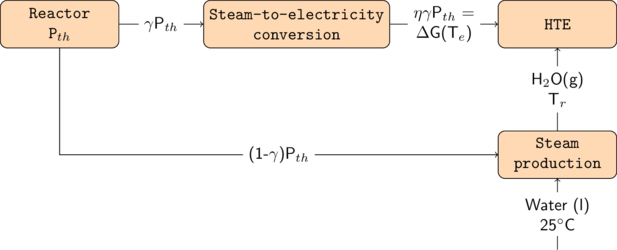

In [106]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure2.png')
w, h = img.size
b = 250
a = int(w/h*b)
img.resize(a, b)
img

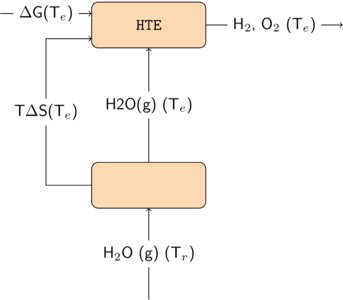

In [107]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure3.png')
w, h = img.size
b = 300
a = int(w/h*b)
img.resize(a, b)
img

#### More complex HTE1:

This case considers that not all the steam is converted into H$_2$ but just a portion. $\Delta \dot{m}$/($\dot{m}+\Delta \dot{m}$) = 60% (I need to find the source where I saw this). 

* T$_e$: temperature at which the electrolysis occurs.
* T$_o$: reactor outlet temperature.
* T$_r$: 97% of T$_o$.
* T*: the temperature of the H$_2$O after being mixed with the steam.

T$_r$ > T$_e$ > T*

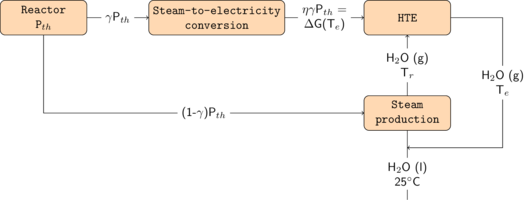

In [109]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure4.png')
w, h = img.size
b = 200
a = int(w/h*b)
img.resize(a, b)
img

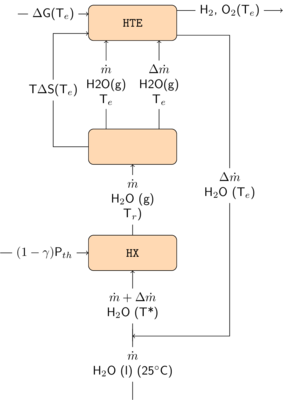

In [113]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte1-figure5.png')
w, h = img.size
b = 400
a = int(w/h*b)
img.resize(a, b)
img

#### Very simple HTE2:

* T$_e$: temperature at which the electrolysis occurs.
* T$_o$: reactor outlet temperature.
* T$_r$: 97% of T$_o$.

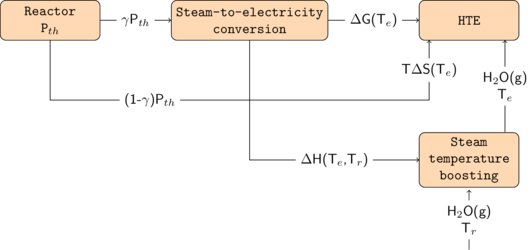

In [117]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte2-figure0.png')
w, h = img.size
b = 250
a = int(w/h*b)
img.resize(a, b)
img

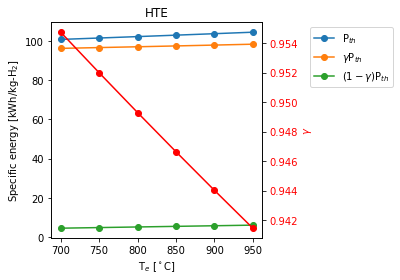

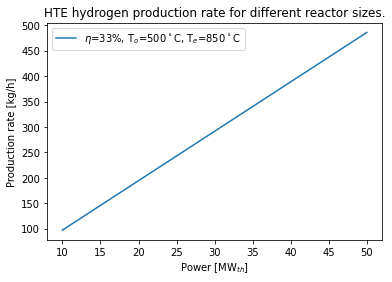

In [53]:
def plot_pth_2T(P, outT, Tl, function, xlab, name="default"):
    """
    plots power requirement to produce 1 kg-H2, and gamma
    for different Te.
    P: pressure [atm]
    outT: reactor outlet temperature[C]
    Tl: list of values of Te[C]
    function: name of the function of the case to analyze
    name: name of the figure to plot
    """

    Pl = [function(P, outT, Te)[0] for Te in Tl]
    gl = [function(P, outT, Te)[1] for Te in Tl]
    gpl = np.array(gl) * np.array(Pl)
    gcl = (1-np.array(gl)) * np.array(Pl)

    fig, ax1 = plt.subplots()
    ax1.plot(outTl, Pl, label='P$_{th}$', marker='o')
    ax1.plot(outTl, gpl, label='$\gamma$P$_{th}$', marker='o')
    ax1.plot(outTl, gcl, label='$(1-\gamma)$P$_{th}$', marker='o')
    ax1.legend(loc="upper left", bbox_to_anchor=(1.2, 1.0), fancybox=True)
    ax1.set_title("HTE", color="black")
    ax1.set_ylabel("Specific energy [kWh/kg-H$_2$]", color="black")
    ax1.set_xlabel(xlab + "[$^\circ$C]")
    ax2 = ax1.twinx()
    ax2.plot(outTl, gl, color='red', marker="o")
    ax2.set_ylabel('$\gamma$', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    fig.tight_layout()
    plt.savefig("figures/"+name, dpi=300, bbox_inches="tight")
    plt.show()

def plot_pr_2P(P, outT, Te, function, name="default"):
    """
    plots the production rate for different reactor sizes.
    P: pressure [atm]
    outT: outlet temperature of the reactor [C]
    function: name of the function of the case to analyze
    name: name of the figure to plot
    """

    Pth = function(P, outT, Te)[0]
    power = [10, 20, 30, 40, 50]  # [MW_{th}]
    prate = [p*1e3/Pth for p in power]

    plt.plot(power, prate, label='$\eta$=33%, T$_o$={0}$^\circ$C, T$_e$={1}$^\circ$C'.format(outT, Te))
    plt.legend(loc="upper left")
    plt.title('HTE hydrogen production rate for different reactor sizes.')
    plt.ylabel('Production rate [kg/h]')
    plt.xlabel('Power [MW$_{th}$]')
    plt.savefig("figures/"+name, dpi=300, bbox_inches="tight")
    plt.show()

def very_simple_hte2(P, outT, Te):
    eta = 0.33 # thermal-to-electrical energy conversion efficiency
    ef = 0.97  # The steam temperature gets to a 97% of the outlet reactor temperature
    Tr = ef * outT
    etef = 0.95  # Electrical-to-thermal conversion efficiency
    # etagammaPth = \eta * \gamma * P_{th} = \Delta G (P, T) + 1/etef*\Delta H (T_e, T_r)
    # gamma comp = (1-\gamma) * P_{th} = T*\Delta S (P, T)
    etagammaPth, gammacPth = power_req(P, Te)
    dH = delta_H(Te, Tr)

    etagammaPth += 1/etef*dH
    gammaPth = etagammaPth/eta  # Electrical power
    Pth = gammaPth + gammacPth  # P_{th} [kJ/mol] = total power
    gamma = gammaPth/Pth  # \gamma
    Pth = Pth/(2*1.008*3.6)  # [kWh/kg-H2]

    return Pth, gamma

P = 3.5 #
P *= 9.86923 # MPa -> atm
outT = 500  # Outlet reactor temperature
Tel = [700, 750, 800, 850, 900, 950]
plot_pth_2T(P, outT, Tel, very_simple_hte2, "T$_e$ ","verysimple-hte2-overT")

outT = 500  # Outlet reactor temperature
Te = 850
plot_pr_2P(P, outT, Te, very_simple_hte2, name="verysimple-hte2-size")

#### Simple HTE2:

* T$_e$: temperature at which the electrolysis occurs.
* T$_r$: 97% of the outlet temperature of the reactor.

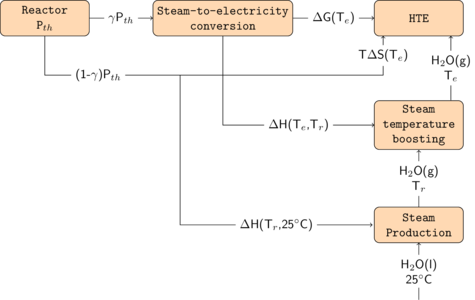

In [119]:
from wand.image import Image as WImage
img = WImage(filename='./figures/hte2-figure1.png')
w, h = img.size
b = 300
a = int(w/h*b)
img.resize(a, b)
img

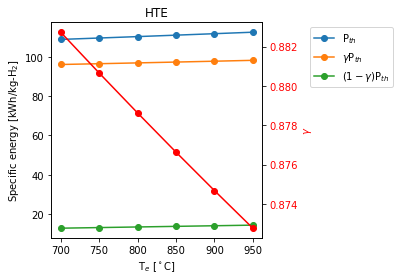

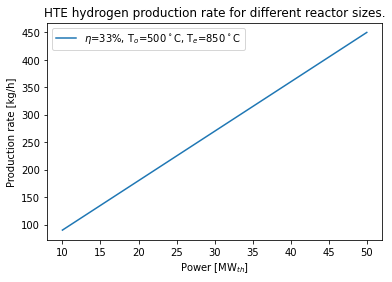

In [54]:
def simple_hte2(P, outT, Te):
    eta = 0.33 # thermal-to-electrical energy conversion efficiency
    ef = 0.97  # The steam temperature gets to a 97% of the outlet reactor temperature
    Tr = ef * outT
    etef = 0.95  # Electrical-to-thermal conversion efficiency
    # etagammaPth = \eta * \gamma * P_{th} = \Delta G (P, T) + 1/etef*\Delta H (T_e, T_r)
    # gamma comp = (1-\gamma) * P_{th} = T*\Delta S (P, T)
    etagammaPth, gammacPth = power_req(P, Te)
    dH1 = delta_H(Te, Tr)  # Steam temperature boosting energy
    dH2 = delta_H(Tr, 25)  # Steam production energy

    etagammaPth += 1/etef*dH1
    gammacPth += dH2
    gammaPth = etagammaPth/eta  # Electrical power
    Pth = gammaPth + gammacPth  # P_{th} [kJ/mol] = total power
    gamma = gammaPth/Pth  # \gamma
    Pth = Pth/(2*1.008*3.6)  # [kWh/kg-H2]

    return Pth, gamma

P = 3.5 #
P *= 9.86923 # MPa -> atm
outT = 500  # Outlet reactor temperature
Tel = [700, 750, 800, 850, 900, 950]
plot_pth_2T(P, outT, Tel, simple_hte2, "T$_e$ ","simple-hte2-overT")

outT = 500  # Outlet reactor temperature
Te = 850
plot_pr_2P(P, outT, Te, simple_hte2, name="simple-hte2-size")

### Future work

* make $\eta$ a function of the reactor outlet temperature for differnet thermodynamic cycles.
* consider the more complex cases.
* consider $\gamma$ as an independent variable. Case where the reactor co-generates process heat and electricity.

### Other sources:
* https://pubs.rsc.org/en/content/articlelanding/2008/jm/b718822f/unauth#!divAbstract
* https://www.sciencedirect.com/science/article/pii/S0378775311024384
* https://www.sciencedirect.com/science/article/abs/pii/0360319988900523
* http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

